In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
data_path = r"NOT_REAL_DATA\\"
# Load images using OpenCV
image_list = []
for filename in os.listdir(data_path):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.tif'):
        img = cv2.imread(os.path.join(data_path, filename))
        image_list.append(img)

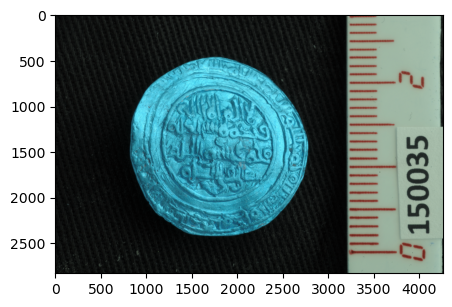

In [25]:
fig = plt.figure(figsize=(5, 6))
  
fig.add_subplot(1, 1, 1)
plt.imshow(image_list[0] )

## *First task*
 Isolate the coin from the image (remove the ruler and the note).

In [21]:
def crop_coin_simple(img, output_path):

    # Convert the image to HSV color space
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds of the color range for the coin
    lower_bound = np.array([20, 50, 50])  # Adjust these values based on the coin's color
    upper_bound = np.array([30, 255, 255])

    # Create a mask using the color range
    mask = cv2.inRange(hsv, lower_bound, upper_bound)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Choose the largest contour (assumed to be the coin)
    largest_contour = max(contours, key=cv2.contourArea)

    # Create a mask for the largest contour
    mask = np.zeros_like(mask)
    cv2.drawContours(mask, [largest_contour], 0, 255, thickness=cv2.FILLED)

    # Bitwise AND the original image with the mask
    coin_roi = cv2.bitwise_and(img, img, mask=mask)

    # Save the cropped coin image
    cv2.imwrite(output_path, coin_roi)

In [27]:
def crop_images(output_dir , image_list):
    # Create output directory if it doesn't exist
    output_dir = "NOT_REAL_DATA_CROPPED"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Process each image in image_list
    for idx, img in enumerate(image_list):
        output_path = os.path.join(output_dir, f"cropped_image_{idx}.jpg")
        crop_coin_simple(img, output_path)
        print(f"Image {idx} cropped and saved to {output_path}")

In [ ]:
def add_padding(image, target_size):
    # Calculate padding dimensions
    h, w = image.shape[:2]
    target_h, target_w = target_size
    pad_h = max(0, target_h - h)
    pad_w = max(0, target_w - w)
    
    # Add padding to the image
    padded_image = cv2.copyMakeBorder(image, 0, pad_h, 0, pad_w, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    
    return padded_image

# Load images using OpenCV
data_path = r"NOT_REAL_DATA_CROPPED\\"
image_list = []
max_height = 0
max_width = 0

# Determine maximum width and height
for filename in os.listdir(data_path):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.tif'):
        img = cv2.imread(os.path.join(data_path, filename))
        h, w = img.shape[:2]
        max_height = max(max_height, h)
        max_width = max(max_width, w)
        image_list.append(img)
       
# Add padding to each image
padded_image_list = []
for img in image_list:
    padded_img = add_padding(img, (max_height, max_width))
    padded_image_list.append(padded_img)

# Save padded images to a new directory
output_dir = "NOT_REAL_DATA_Padded"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i, padded_img in enumerate(padded_image_list):
    output_path = os.path.join(output_dir, f"padded_image_{i}.jpg")
    cv2.imwrite(output_path, padded_img)


In [32]:
# Check if all images have the same size
sizes = set()
for img in padded_image_list:
    sizes.add(img.shape[:2])

if len(sizes) == 1:
    print("All images have the same size.")
    print("Size:", sizes.pop())
else:
    print("Images have different sizes.")

All images have the same size.
Size: (2832, 4256)
